# Wine Quality
Here, I will apply different ML algorithms to predict quality of wine.

1) **Normal equation**

The prediction of wine quality by **normal equation** is a **linear regression** task. **Normal equation** is an analytical approach to Linear Regression with a Least Square Cost Function.
We can directly find out the value of θ without using Gradient Descent. Following this approach is an effective and time-saving option when are working with a dataset with small features.
(click on the link to find more <a href="https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/"><code>link1</code></a> and <a href="http://mlwiki.org/index.php/Normal_Equation"><code>link2</code></a>

2) **Random forest classifier**

    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

How to get data online:
<details>
    The code snippet below is responsible for downloading the dataset for example when running via Google Colab. You can also directly download the file using the link if you work with a local setup (in that case, ignore the the block below with !wget)

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2022-03-18 19:59:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[===================>] 258,23K   357KB/s    in 0,7s    

2022-03-18 19:59:25 (357 KB/s) - ‘winequality-white.csv’ saved [264426/264426]



In [3]:
# load data from csv file and make a numpy array
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

data: (4898, 12)


In [4]:
# take the first 3000 examples for training
x_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
x_test = data[3000:,:11]
y_test = data[3000:,11]

print("First example:")
print("Features:", x_train[0]) # [0] refers to the first example
print("Quality:", y_train[0])

First example:
Features: [5.9000e+00 2.0000e-01 4.0000e-01 1.3000e+00 4.7000e-02 2.3000e+01
 9.2000e+01 9.9232e-01 3.2000e+00 4.5000e-01 1.0000e+01]
Quality: 6.0


In [5]:
features = ["fixed acidity", "volatile acidity", "citric acid", 
            "residual sugar", "chlorides", "free sulfur dioxide", 
            "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

## Data visualization

First we want to understand the data better. 
* Plot (`plt.hist`) the distribution of each of the features for the training data.
* the 2D distribution (either `plt.scatter` or `plt.hist2d`) of each feature versus quality.
* Also calculate the correlation coefficient (`np.corrcoef`) for each feature with quality. Which feature by itself seems most predictive for the quality?


<details>
    <a href="https://realpython.com/python-enumerate/"><code>enumerate</code></a>

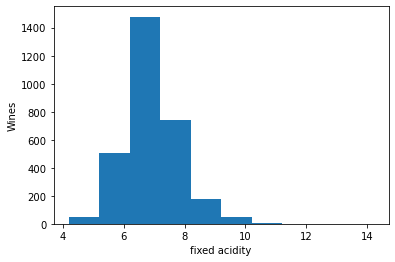

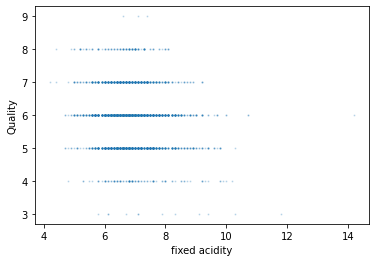

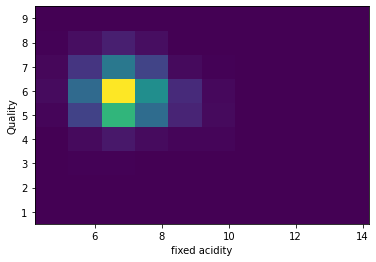

Feature: fixed acidity
Correlation coefficient: -0.124


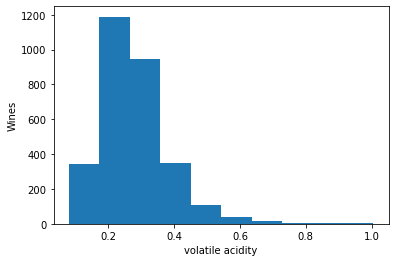

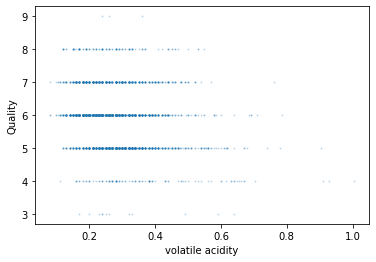

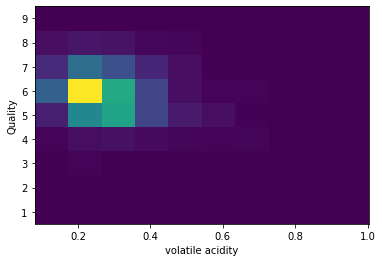

Feature: volatile acidity
Correlation coefficient: -0.195


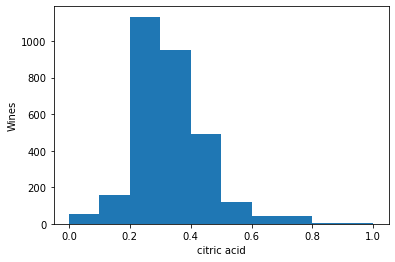

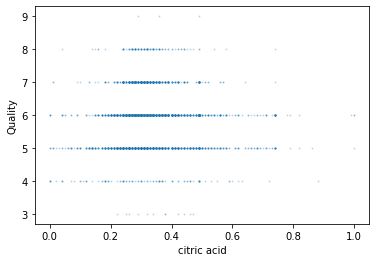

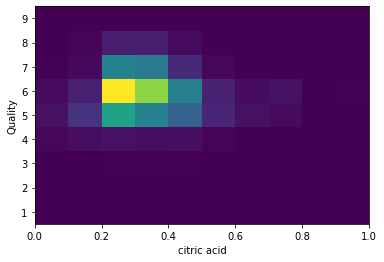

Feature: citric acid
Correlation coefficient: -0.019


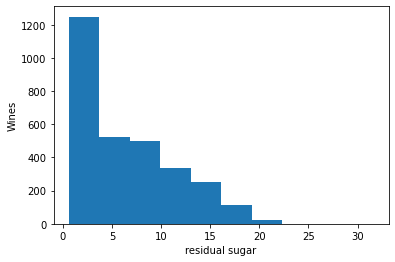

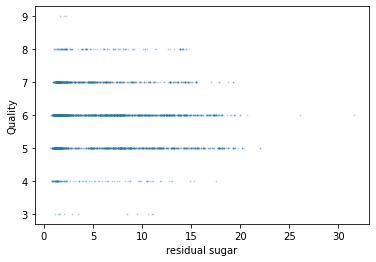

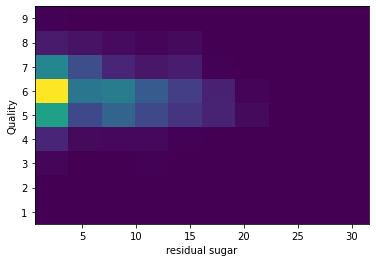

Feature: residual sugar
Correlation coefficient: -0.084


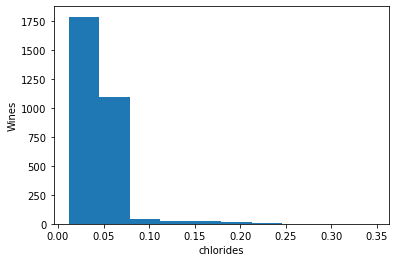

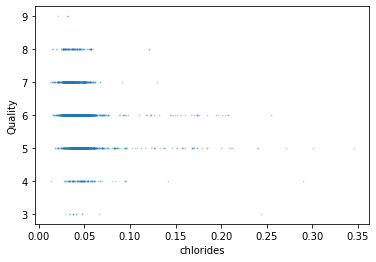

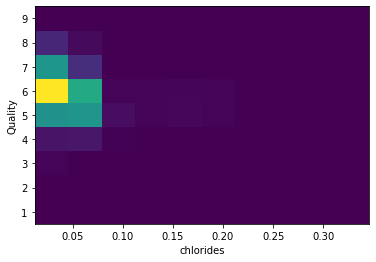

Feature: chlorides
Correlation coefficient: -0.208


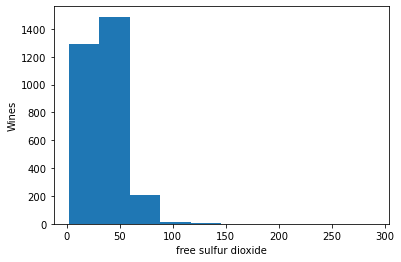

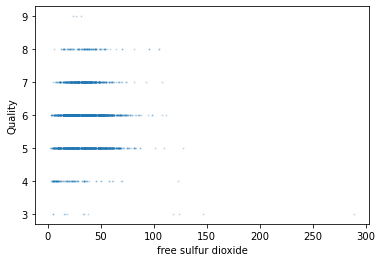

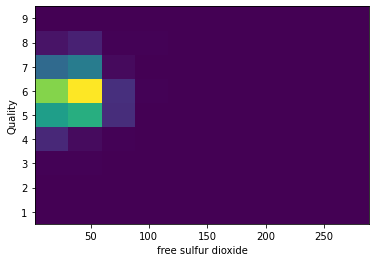

Feature: free sulfur dioxide
Correlation coefficient: 0.010


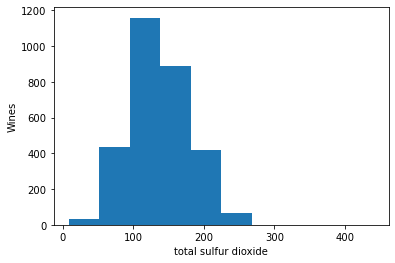

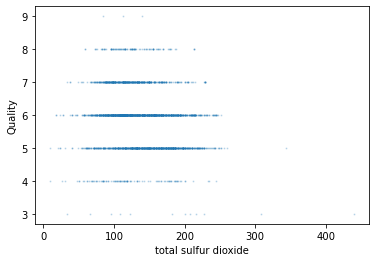

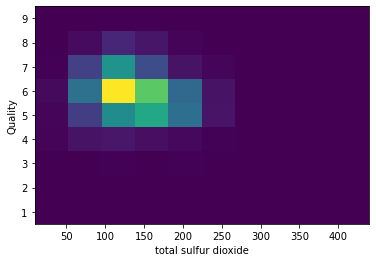

Feature: total sulfur dioxide
Correlation coefficient: -0.174


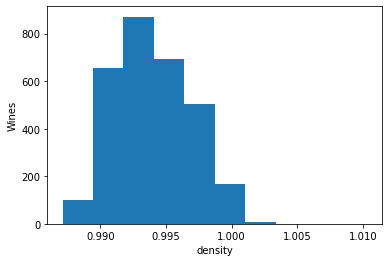

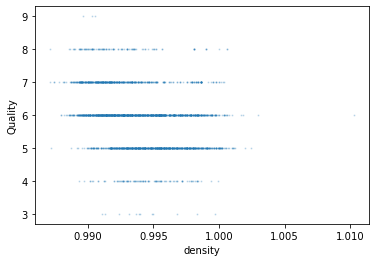

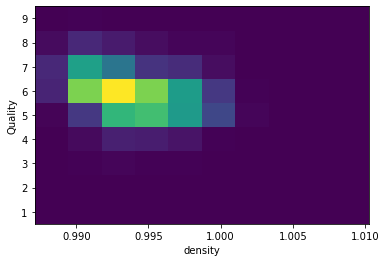

Feature: density
Correlation coefficient: -0.315


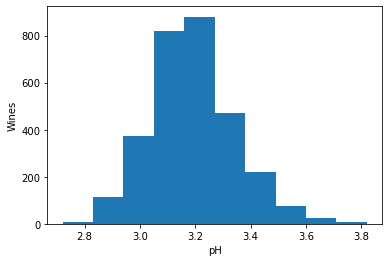

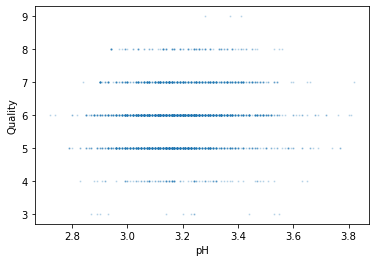

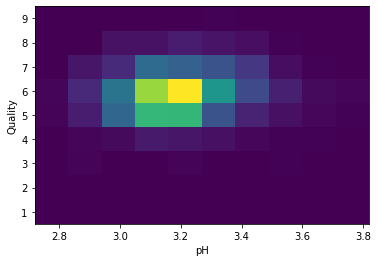

Feature: pH
Correlation coefficient: 0.101


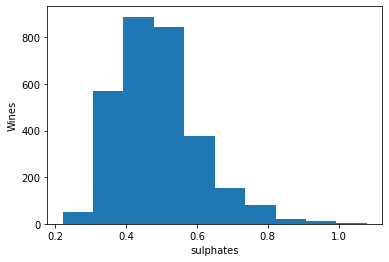

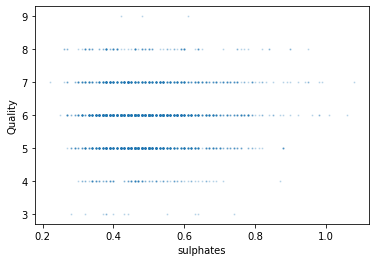

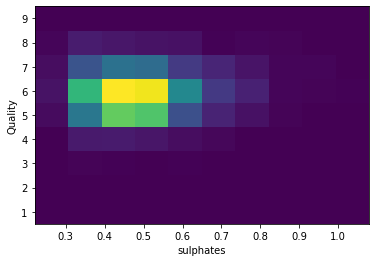

Feature: sulphates
Correlation coefficient: 0.054


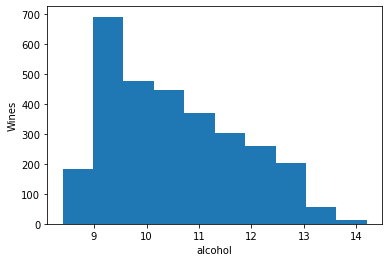

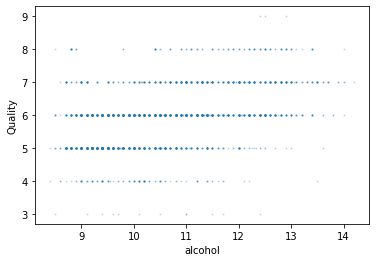

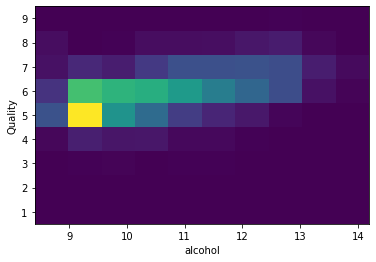

Feature: alcohol
Correlation coefficient: 0.445


<Figure size 432x288 with 0 Axes>

In [7]:
# Loop over all features
for element_index, element in enumerate(features):
    
    # 1D Histogram 
    plt.hist(x_train[:,element_index])
    plt.xlabel(element)
    plt.ylabel("Wines")
    plt.show()
    
    # Scatter Plot
    plt.scatter(x_train[:,element_index],y_train, s=1, alpha=0.2)
    plt.xlabel(element)
    plt.ylabel("Quality")
    plt.show()

    # Scatter Plot
    plt.hist2d(x_train[:,element_index],y_train, bins=[10, np.arange(0.5, 10.5, 1)])
    plt.xlabel(element)
    plt.ylabel("Quality")
    plt.show()
    
    # Calulate correlation coefficient
    plt.clf()
    print(f"Feature: {element}")
    print(f"Correlation coefficient: {np.corrcoef(x_train[:,element_index],y_train)[0,1]:.3f}") 


##  1) Normal equation

* Calculate the linear regression weights by solving the normal equation: 
    * `w = (x_T x)^{-1} x_T y`


<details>
    
    * Numpy provides functions for 
        * matrix multiplication (`np.matmul`), 
        * matrix transposition (`.T`),
        * matrix inversion (`np.linalg.inv`).


In [8]:
# Calulate weights using train data

w = np.matmul(np.matmul(np.linalg.inv(np.matmul(x_train.T, x_train)), x_train.T),y_train)

print(w)
print(w.shape)

[-5.20239585e-02 -1.92994407e+00 -4.50517610e-02  2.88323637e-02
 -7.98949424e-01  4.22275687e-03 -7.45152873e-04  1.85006220e+00
  1.81938347e-01  4.71351559e-01  3.74954792e-01]
(11,)


* Use the weights to predict the quality for the test dataset.
    * `y_{predict} = x_{test} w`

In [9]:
# Evaluate linear regression model 
y_pred = np.matmul(x_test,w)

print(x_test.shape,w.shape,y_pred.shape)
print(x_test[0])
print(y_pred[0])

(1898, 11) (11,) (1898,)
[6.8000e+00 3.0000e-01 2.7000e-01 1.1600e+01 2.8000e-02 2.2000e+01
 9.7000e+01 9.9314e-01 2.9600e+00 3.8000e-01 1.1700e+01]
6.329788481145896


* To find how the predicted quality is good compared to the true quality of the test data, calculate the correlation coefficient between predicted and true quality and draw a scatter plot.

Correlation coefficient: 0.5041120410225467


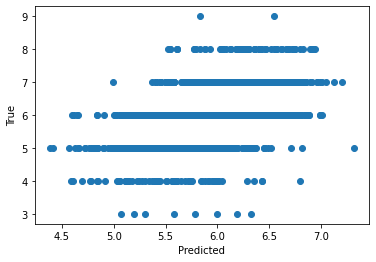

In [10]:
print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])

# Prepare scatter plot
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 2) Random Forest Classifier

In [11]:
# make pandas DataFrame of data
columns = ["fixed acidity", "volatile acidity", "citric acid", 
            "residual sugar", "chlorides", "free sulfur dioxide", 
            "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
df = pd.DataFrame(data, columns=columns )
df.shape

(4898, 12)

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.9,0.20,0.40,1.3,0.047,23.0,92.0,0.99232,3.20,0.45,10.0,6.0
1,6.2,0.20,0.25,15.0,0.055,8.0,120.0,0.99767,3.19,0.53,9.6,6.0
2,5.8,0.30,0.12,1.6,0.036,57.0,163.0,0.99239,3.38,0.59,10.5,6.0
3,6.4,0.22,0.34,1.8,0.057,29.0,104.0,0.99590,3.81,0.57,10.3,6.0
4,7.4,0.33,0.26,15.6,0.049,67.0,210.0,0.99907,3.06,0.68,9.5,5.0


In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Dataset does not have any null.

## Data visualization

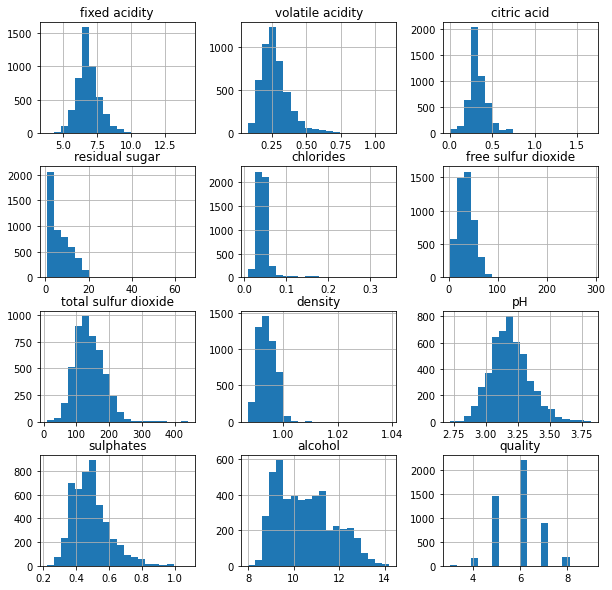

In [16]:
df.hist(bins=20,figsize=(10,10))
plt.show()

Let's check how the quality of wine change by alcohol.

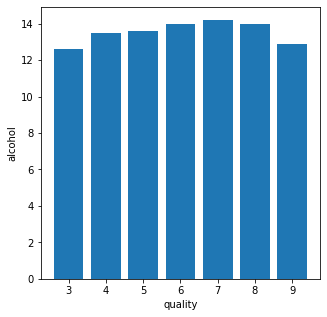

In [17]:
plt.figure(figsize=[5,5])
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

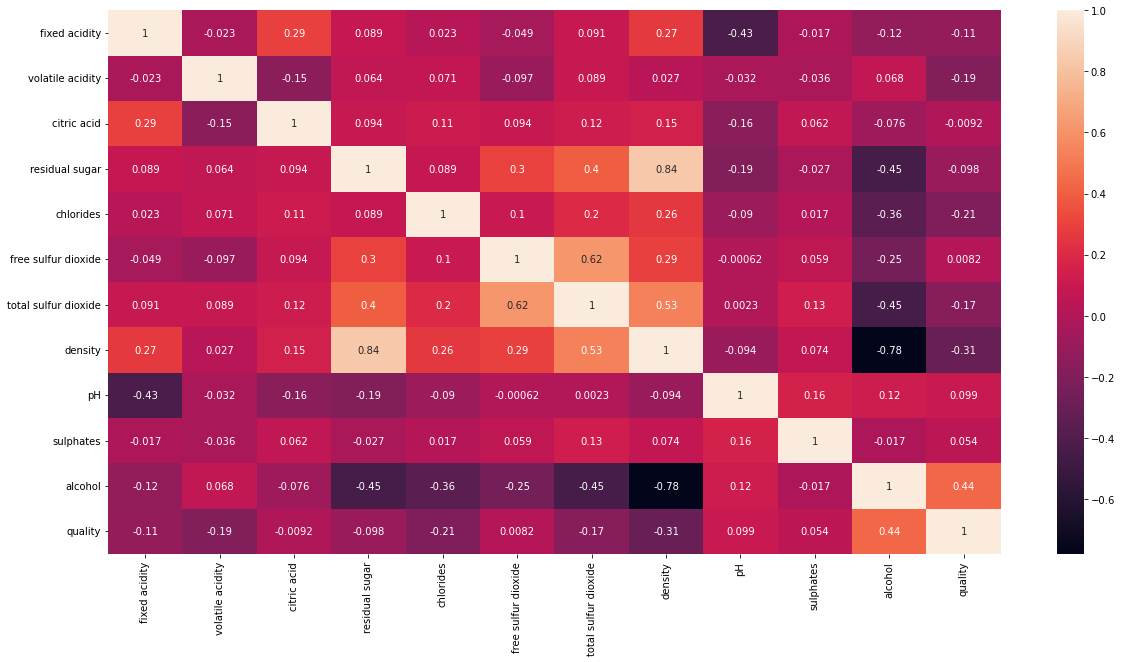

In [18]:
# correlation by visualization
plt.figure(figsize=[20,10])
# plot correlation
sb.heatmap(df.corr(),annot=True)
plt.show()

In [19]:
df.corr(method='pearson',min_periods=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [20]:
# features and target
X = df.drop(['quality'],axis=1)

Y = df['quality']
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.131557,-0.776323,0.543838,-1.003919,0.056196,-0.723775,-1.091000,-0.570914,0.077712,-0.349184,-0.417935
1,-0.776015,-0.776323,-0.695755,1.697430,0.422400,-1.605848,-0.432079,1.218024,0.011480,0.351868,-0.743008
2,-1.250071,0.215896,-1.770069,-0.944765,-0.447335,1.275590,0.579835,-0.547507,1.269882,0.877657,-0.011595
3,-0.538987,-0.577879,0.048001,-0.905330,0.513951,-0.370946,-0.808605,0.626170,4.117844,0.702394,-0.174131
4,0.646153,0.513561,-0.613115,1.815737,0.147747,1.863638,1.685880,1.686157,-0.849531,1.666341,-0.824276
5,0.172097,-0.478657,0.709117,2.298825,0.193523,-0.018117,0.132710,1.963693,0.210175,-0.612079,-1.393152
6,-1.131557,-0.875545,0.295920,-1.102508,-0.859314,-1.899872,-2.761835,-1.446992,-0.650836,-1.576026,0.232210
7,0.290611,1.902667,-0.365197,1.657994,-0.996641,-0.782580,0.085644,0.385415,-0.452141,-0.086290,1.207427
8,1.357237,-0.081770,-0.034638,-1.023637,0.193523,0.334712,-0.832138,-1.339990,-1.246921,-0.349184,1.532500
9,-0.538987,-1.272432,0.874397,-1.023637,-0.126906,1.863638,0.273907,-1.112611,-0.319678,2.104498,0.557282


Split train set into random train and validation subsets.

In [22]:
from sklearn.model_selection import train_test_split
 
# creating train test splits
X_train, X_valid, Y_train, Y_valid = train_test_split(X_scaled, Y, train_size=0.7, test_size=0.3)

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_valid.shape[0]}")

No. of training examples: 3428
No. of testing examples: 1470


In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [24]:
Y_pre = model.predict(X_valid)

Check the accuracy of the prediction

In [26]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Y_valid,Y_pre)
RMSE = np.sqrt(MSE)

print('mean squared error is',MSE)
 
print('............................................')
 
print('root mean squared error is',RMSE)

mean squared error is 0.49795918367346936
............................................
root mean squared error is 0.705662230584484
